In [1]:
import sys
sys.path.append("/home/149/ab8992/tasman-tides/")
import xarray as xr
import ttidelib as tt
import scipy
import cmocean
import os
from pathlib import Path
cmap = cmocean.cm.dense_r
import matplotlib
import matplotlib.pyplot as plt
earth_cmap = matplotlib.colormaps["gist_earth"]
from datetime import timedelta

# import filtering
import numpy as np
import dask
dask.config.set({'logging.distributed': 'error'})
from dask.distributed import Client,default_client
import xrft

expts = ["full-10","beamless-10","smooth-10","beamless-20","smooth-20","full-20","full-40","beamless-40","smooth-40"]
# client = Client(threads_per_worker=1)
# client

## Plot raw dissipation over long time average

In [14]:
200 * 160 / (230 * 140)

0.9937888198757764

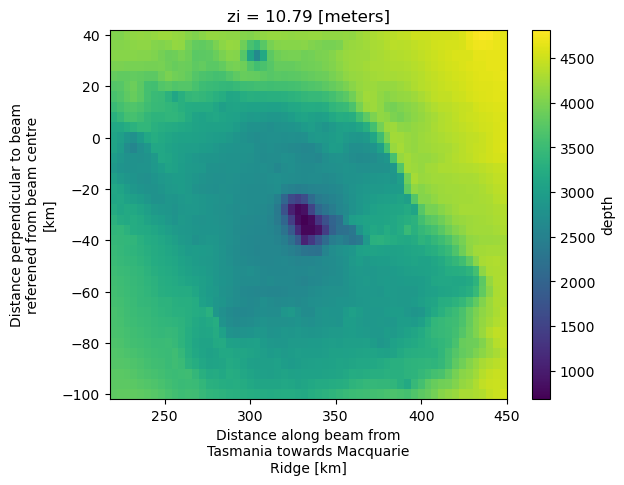

In [13]:
bathy = xr.open_dataset("/g/data/nm03/ab8992/outputs/full-20/bathy_transect.nc")

bathy.depth.sel(xb = slice(220,450),yb = slice(-100,40)).plot()

In [19]:
def ShelfMask(data):
    return data.where(
        (data.bathy > -3000) & (data.xb < 200) & (data.bathy < 0),np.nan
    )
def calculate_dissipation(expt,t0):
    with tt.collect_data(
        expt,
        rawdata = ["ahh","u","v"],
        timerange = (t0,t0 + 233 * 50)
        ).sel(xb = slice(214,456),yb = slice(-104,44)) as data:
        
        return xr.merge(
            [
            1e-6 * (data.ahh * (data.u.differentiate("xb").differentiate("xb") + data.v.differentiate("yb").differentiate("yb"))**2).mean("time").fillna(0).rename("dissipation").load(),
            data.bathy
            ]
        )

# full10 = calculate_dissipation("full-10",22000)
# beamless10 = calculate_dissipation("beamless-10",22000)
# smooth10 = calculate_dissipation("smooth-10",22000)
# full20 = calculate_dissipation("full-20",22000)
# beamless20 = calculate_dissipation("beamless-20",22000)
# smooth20 = calculate_dissipation("smooth-20",22000)
full40 = calculate_dissipation("full-40",4216)
beamless40 = calculate_dissipation("beamless-40",4216)
smooth40 = calculate_dissipation("smooth-40",4216)


loading ahh...	done.
loading u...	done.
loading v...	done.
loading ahh...	done.
loading u...	done.
loading v...	done.
loading ahh...	done.
loading u...	done.
loading v...	done.


2025-02-03 17:08:18,377 - distributed.worker - ERROR - Worker stream died during communication: tcp://127.0.0.1:41197
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/tornado/iostream.py", line 861, in _read_to_buffer
    bytes_read = self.read_from_fd(buf)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/tornado/iostream.py", line 1116, in read_from_fd
    return self.socket.recv_into(buf, len(buf))
ConnectionResetError: [Errno 104] Connection reset by peer

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/worker.py", line 2059, in gather_dep
    response = await get_data_from_worker(
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/worker.py", line 2

In [2]:
# full10.to_netcdf("/g/data/nm03/ab8992/postprocessed/seamount_dissipation/full10.nc")
# beamless10.to_netcdf("/g/data/nm03/ab8992/postprocessed/seamount_dissipation/beamless10.nc")
# smooth10.to_netcdf("/g/data/nm03/ab8992/postprocessed/seamount_dissipation/smooth10.nc")
# full20.to_netcdf("/g/data/nm03/ab8992/postprocessed/seamount_dissipation/full20.nc")
# beamless20.to_netcdf("/g/data/nm03/ab8992/postprocessed/seamount_dissipation/beamless20.nc")
# smooth20.to_netcdf("/g/data/nm03/ab8992/postprocessed/seamount_dissipation/smooth20.nc")
# full40.to_netcdf("/g/data/nm03/ab8992/postprocessed/seamount_dissipation/full40.nc")
# beamless40.to_netcdf("/g/data/nm03/ab8992/postprocessed/seamount_dissipation/beamless40.nc")
# smooth40.to_netcdf("/g/data/nm03/ab8992/postprocessed/seamount_dissipation/smooth40.nc")

full10 = xr.open_dataset("/g/data/nm03/ab8992/postprocessed/seamount_dissipation/full10.nc")
beamless10 = xr.open_dataset("/g/data/nm03/ab8992/postprocessed/seamount_dissipation/beamless10.nc")
smooth10 = xr.open_dataset("/g/data/nm03/ab8992/postprocessed/seamount_dissipation/smooth10.nc")
full20 = xr.open_dataset("/g/data/nm03/ab8992/postprocessed/seamount_dissipation/full20.nc")
beamless20 = xr.open_dataset("/g/data/nm03/ab8992/postprocessed/seamount_dissipation/beamless20.nc")
smooth20 = xr.open_dataset("/g/data/nm03/ab8992/postprocessed/seamount_dissipation/smooth20.nc")
full40 = xr.open_dataset("/g/data/nm03/ab8992/postprocessed/seamount_dissipation/full40.nc")
beamless40 = xr.open_dataset("/g/data/nm03/ab8992/postprocessed/seamount_dissipation/beamless40.nc")
smooth40 = xr.open_dataset("/g/data/nm03/ab8992/postprocessed/seamount_dissipation/smooth40.nc")

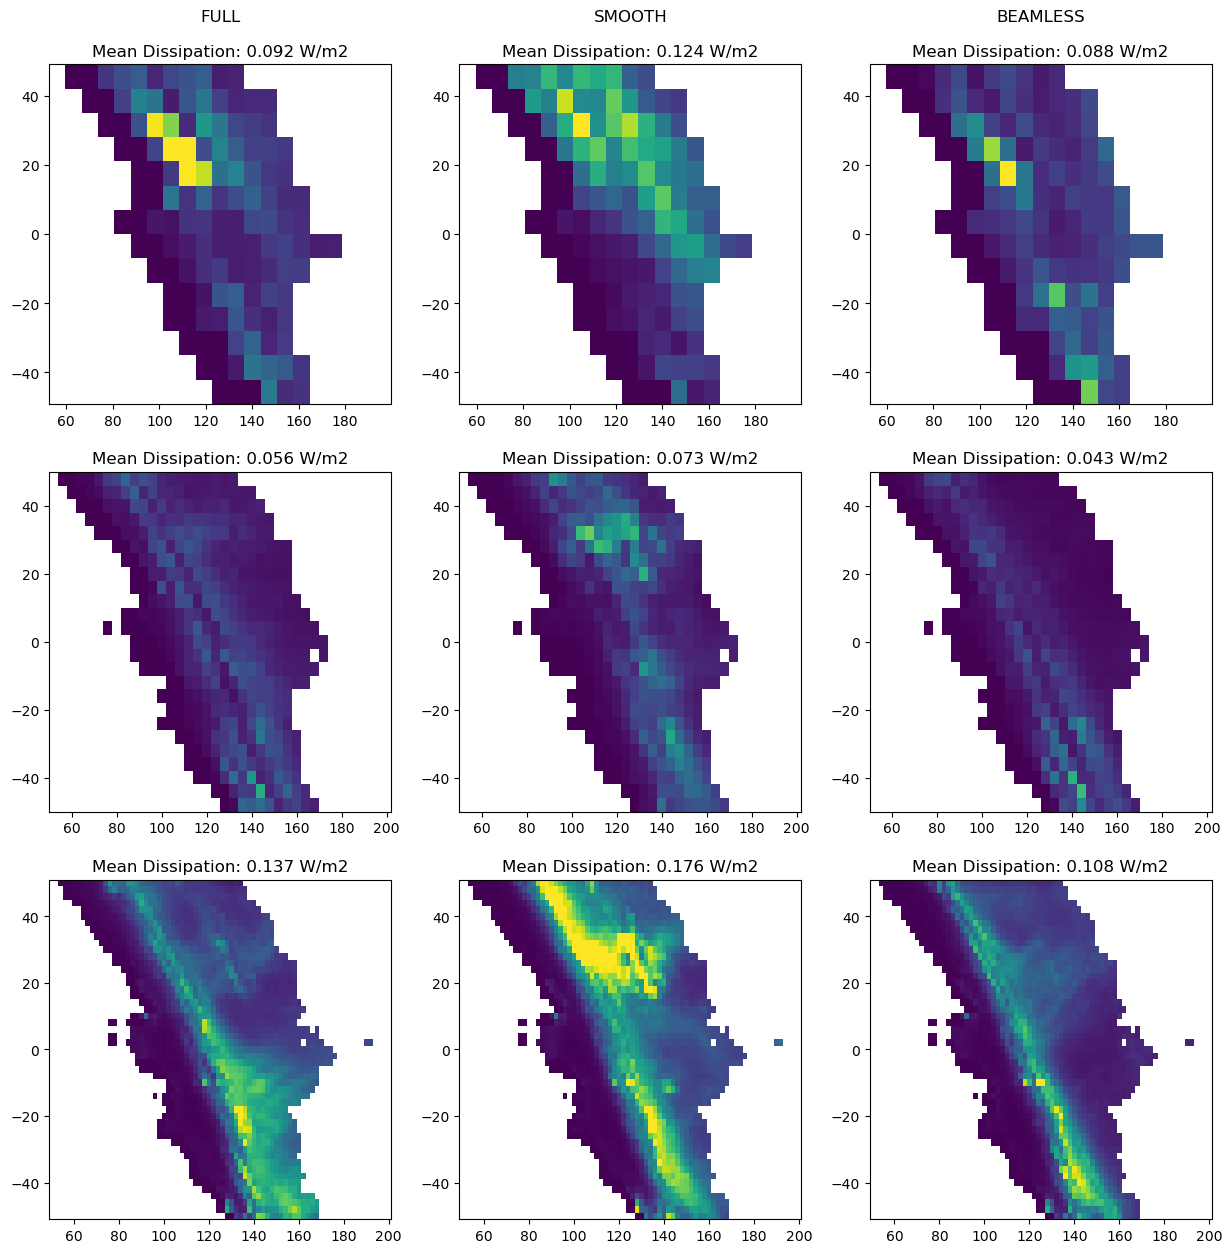

In [59]:
def ShelfMask(data,bathy):
    return 1e-6 * data.where(
        (bathy > -3000) & (data.xb < 200) & (bathy < -50),np.nan
    )

bathy20 = -1 * xr.open_dataset("/g/data/nm03/ab8992/outputs/full-20/bathy_transect.nc").depth.sel(xb = slice(0,250),yb = slice(-50,50))
bathy10 = -1 * xr.open_dataset("/g/data/nm03/ab8992/outputs/full-10/bathy_transect.nc").depth.sel(xb = slice(0,250),yb = slice(-50,50))
bathy40 = -1 * xr.open_dataset("/g/data/nm03/ab8992/outputs/full-40/bathy_transect.nc").depth.sel(xb = slice(0,250),yb = slice(-50,50))
names = ["FULL","SMOOTH","BEAMLESS"]
fig,ax = plt.subplots(3,3,figsize = (15,15))
for j,i in enumerate([full10,smooth10,beamless10]):
    v = round(float(ShelfMask(i,bathy10).mean("xb").mean("yb").values),3)
    ShelfMask(i,bathy10).sel(xb = slice(50,200)).plot(vmax = 0.5,ax = ax[0,j],add_colorbar = False)
    ax[0,j].set_title(f"{names[j]}\n\nMean Dissipation: {v} W/m2")
    ax[0,j].set_ylabel("")
    ax[0,j].set_xlabel("")
for j,i in enumerate([full20,smooth20,beamless20]):
    v = round(float(ShelfMask(i,bathy20).mean("xb").mean("yb").values),3)
    ShelfMask(i,bathy20).sel(xb = slice(50,200)).plot(vmax = 0.5,ax = ax[1,j],add_colorbar = False)
    ax[1,j].set_title(f"Mean Dissipation: {v} W/m2")
    ax[1,j].set_ylabel("")
    ax[1,j].set_xlabel("")
for j,i in enumerate([full40,smooth40,beamless40]):
    v = round(float(ShelfMask(i,bathy40).mean("xb").mean("yb").values),3)
    ShelfMask(i,bathy40).sel(xb = slice(50,200)).plot(vmax = 0.5,ax = ax[2,j],add_colorbar = False)
    ax[2,j].set_ylabel("")
    ax[2,j].set_xlabel("")
    ax[2,j].set_title(f"Mean Dissipation: {v} W/m2")

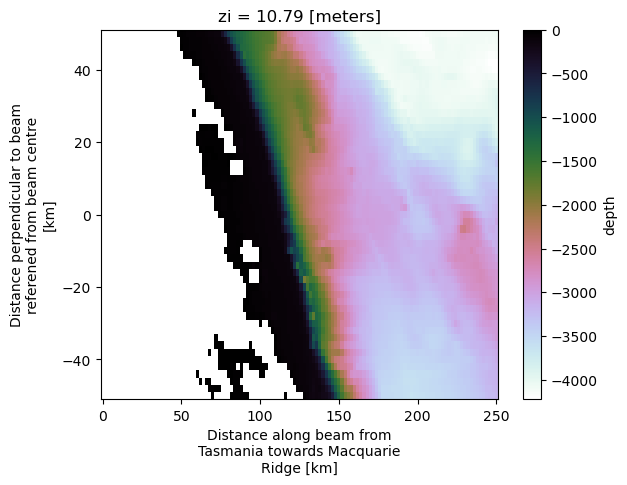

In [63]:
bathy40.where(bathy40 < 0,np.nan).plot(cmap = "cubehelix_r",vmax = 0)

## Transects of dissipation

In [27]:
full20.yb.values

array([-80., -76., -72., -68., -64., -60., -56., -52., -48., -44., -40.,
       -36., -32., -28., -24., -20., -16., -12.,  -8.,  -4.,   0.,   4.,
         8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,  44.,  48.,
        52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.])

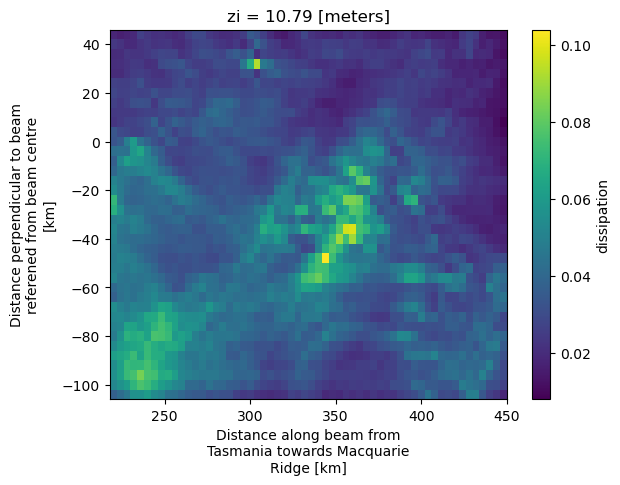

In [31]:
full20.dissipation.fillna(0).integrate("zl").plot()


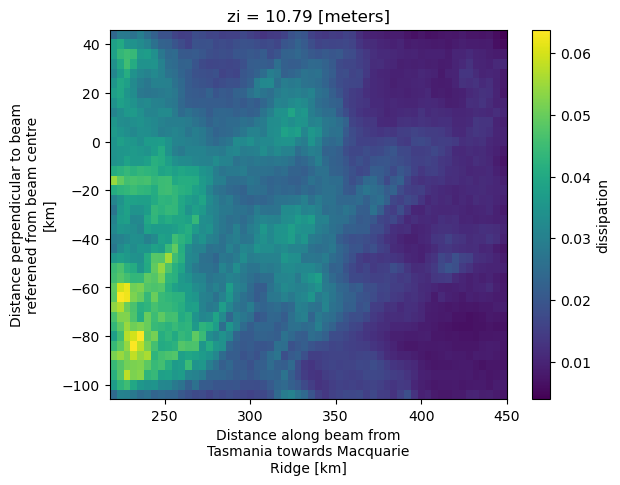

In [30]:
smooth20.dissipation.fillna(0).integrate("zl").plot()

## Mean in y

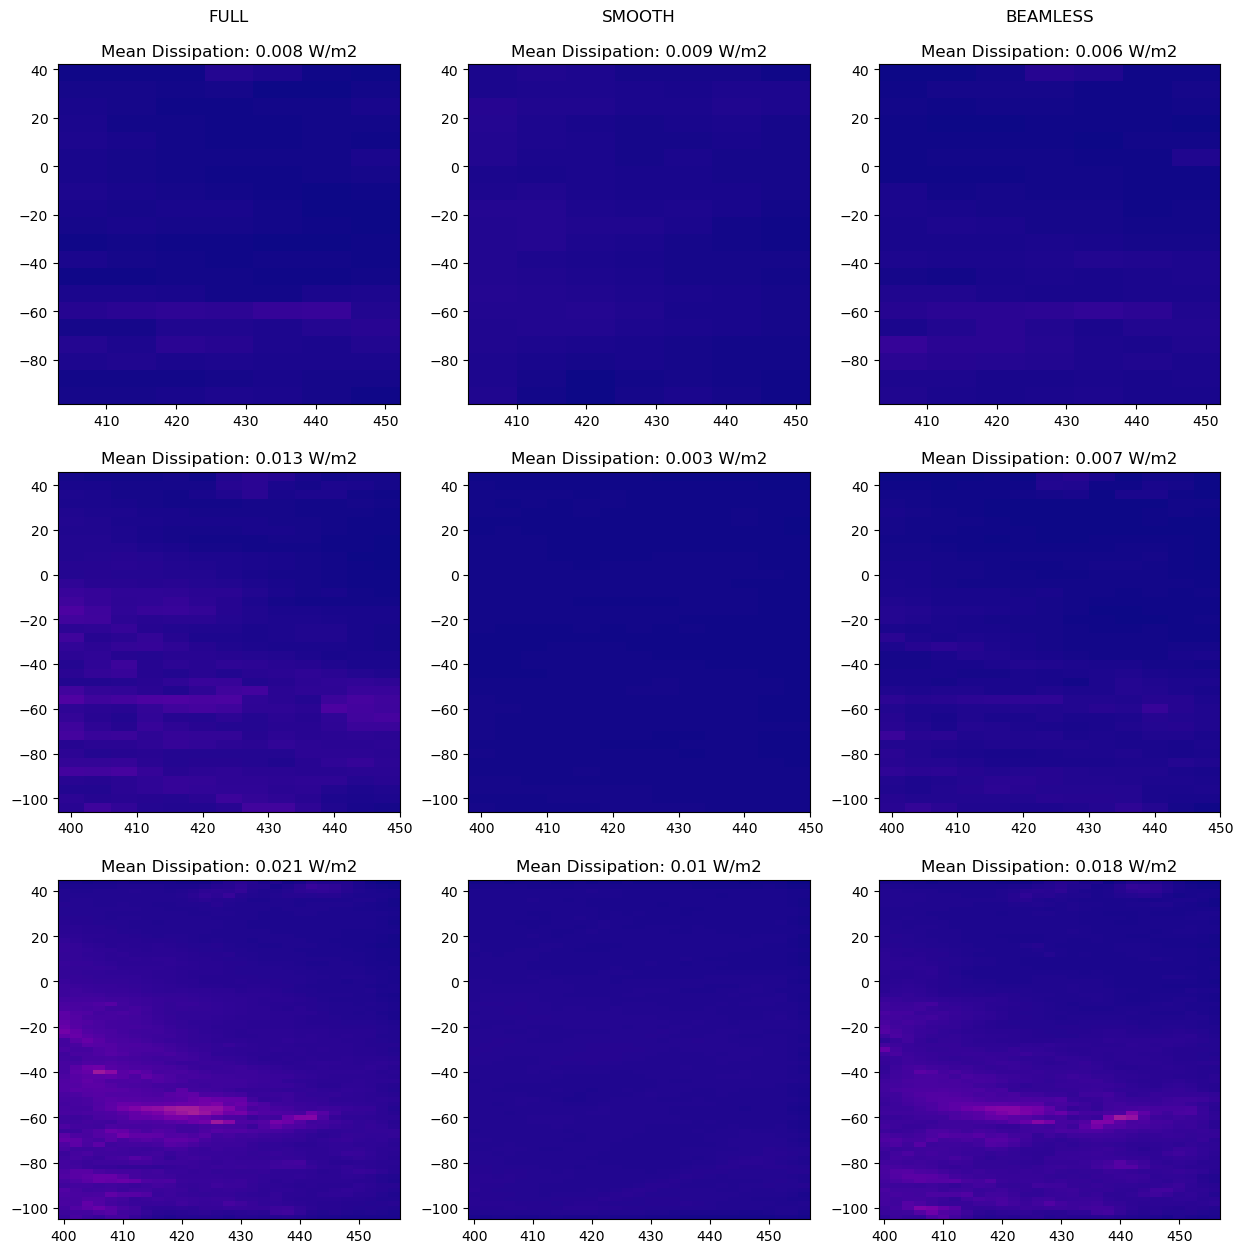

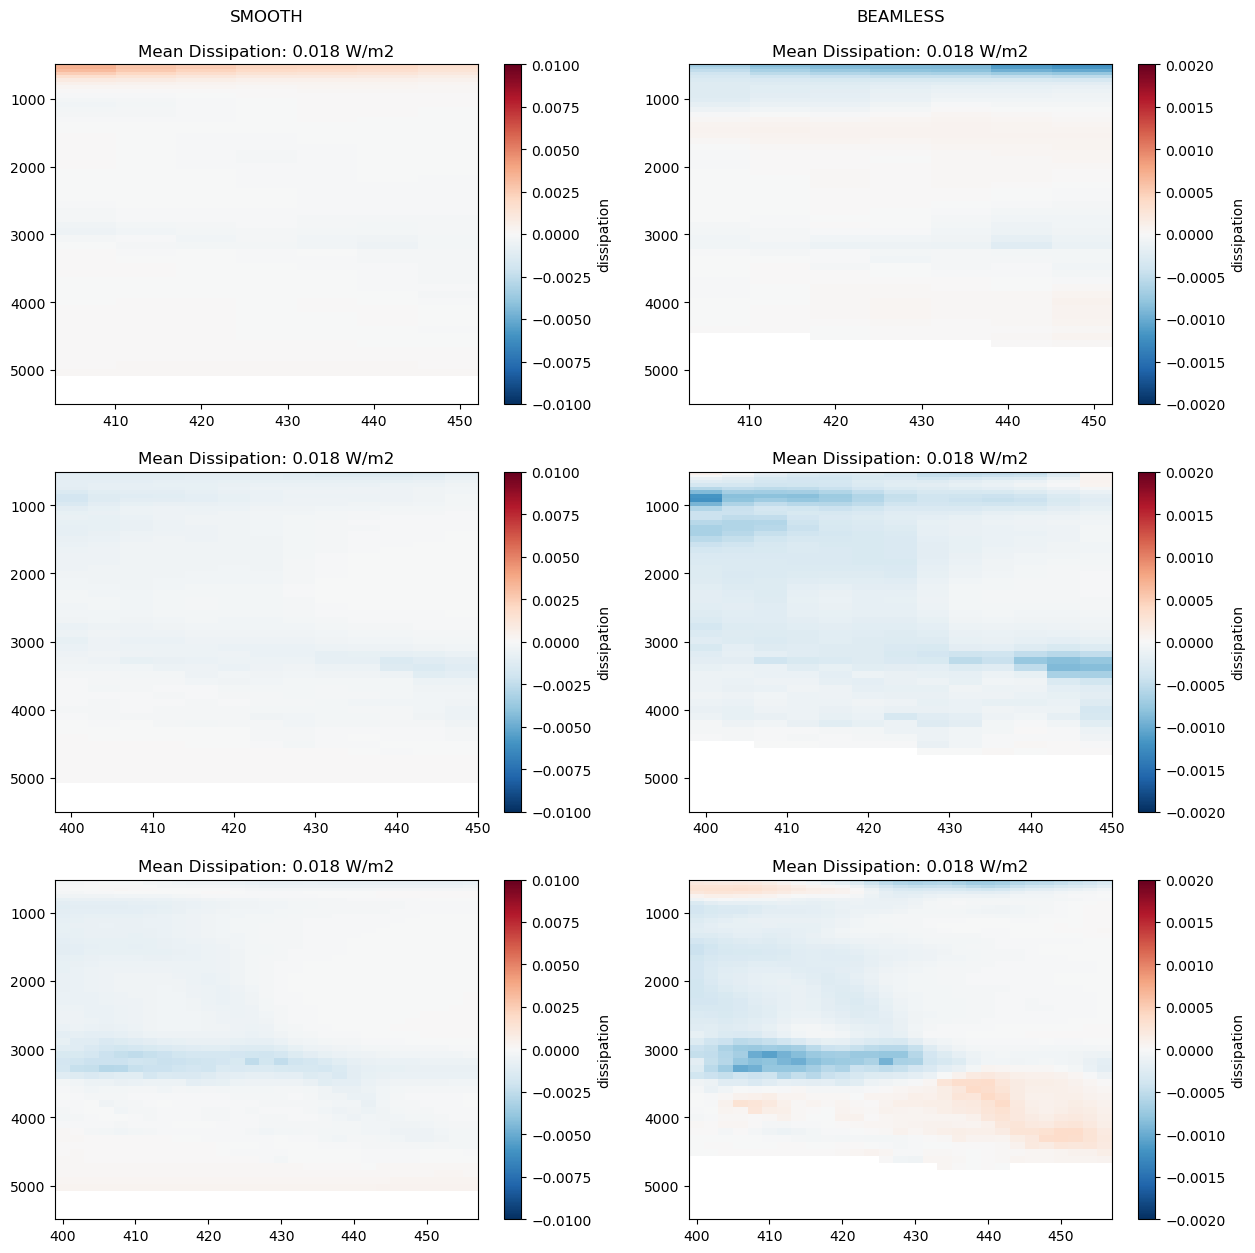

In [3]:
def ShelfMask(data):
    return data.where(
        (data.bathy > -3000) & (data.bathy < - 500),np.nan
    ).sel(zl = slice(500,None))

def ShelfMask(data):
    return data.sel(zl = slice(500,None),xb = slice(400,None))


names = ["FULL","SMOOTH","BEAMLESS"]
fig,ax = plt.subplots(3,3,figsize = (15,15))
for j,i in enumerate([full10,smooth10,beamless10]):
    v = round(float(ShelfMask(i).dissipation.integrate("zl").mean("xb").mean("yb").values),3)
    i.bathy.sel(xb = slice(50,None)).plot(vmin = 2000,vmax = 4000,ax = ax[0,j],add_colorbar = False,cmap = "Greys_r")

    ShelfMask(i).dissipation.integrate("zl").plot(vmax = 0.25,ax = ax[0,j],add_colorbar = False,cmap = "plasma")
    # tt.plot_topo(ax[0,j],-1 * full10.bathy)
    ax[0,j].set_title(f"{names[j]}\n\nMean Dissipation: {v} W/m2")
    ax[0,j].set_ylabel("")
    ax[0,j].set_xlabel("")
for j,i in enumerate([full20,smooth20,beamless20]):
    v = round(float(ShelfMask(i).dissipation.integrate("zl").mean("xb").mean("yb").values),3)
    i.bathy.sel(xb = slice(50,None)).plot(vmin = 2000,vmax = 4000,ax = ax[1,j],add_colorbar = False,cmap = "Greys_r")
    ShelfMask(i).dissipation.integrate("zl").plot(vmax = 0.25,ax = ax[1,j],add_colorbar = False,cmap = "plasma")
    # tt.plot_topo(ax[1,j],-1 * full20.bathy)
    ax[1,j].set_title(f"Mean Dissipation: {v} W/m2")
    ax[1,j].set_ylabel("")
    ax[1,j].set_xlabel("")
for j,i in enumerate([full40,smooth40,beamless40]):
    v = round(float(ShelfMask(i).dissipation.integrate("zl").mean("xb").mean("yb").values),3)
    i.bathy.sel(xb = slice(50,None)).plot(vmin = 2000,vmax = 4000,ax = ax[2,j],add_colorbar = False,cmap = "Greys_r")

    ShelfMask(i).dissipation.integrate("zl").plot(vmax = 0.25,ax = ax[2,j],add_colorbar = False,cmap = "plasma")
    # tt.plot_topo(ax[2,j],-1 * full40.bathy)
    ax[2,j].set_ylabel("")
    ax[2,j].set_xlabel("")
    ax[2,j].set_title(f"Mean Dissipation: {v} W/m2")


names = ["SMOOTH","BEAMLESS"]
vmax = [0.01,0.002]
fig,ax = plt.subplots(3,2,figsize = (15,15))
for j,i in enumerate([smooth10,beamless10]):
    out = (ShelfMask(i) - ShelfMask(full10)).dissipation.fillna(0).integrate("yb")
    out.where(out != 0,np.nan).plot(ax = ax[0,j],add_colorbar = True,vmax = vmax[j],vmin = -vmax[j],cmap = "RdBu_r")
    ax[0,j].set_title(f"{names[j]}\n\nMean Dissipation: {v} W/m2")
    ax[0,j].set_ylabel("")
    ax[0,j].set_xlabel("")
    ax[0,j].invert_yaxis()
for j,i in enumerate([smooth20,beamless20]):
    out = (ShelfMask(i) - ShelfMask(full20)).dissipation.fillna(0).integrate("yb")
    out.where(out != 0,np.nan).plot(ax = ax[1,j],add_colorbar = True,vmax = vmax[j],vmin = -vmax[j],cmap = "RdBu_r")
    ax[1,j].set_title(f"Mean Dissipation: {v} W/m2")
    ax[1,j].set_ylabel("")
    ax[1,j].set_xlabel("")
    ax[1,j].invert_yaxis()
for j,i in enumerate([smooth40,beamless40]):
    out = (ShelfMask(i) - ShelfMask(full40)).dissipation.fillna(0).integrate("yb")
    out.where(out != 0,np.nan).plot(ax = ax[2,j],add_colorbar = True,vmax = vmax[j],vmin = -vmax[j],cmap = "RdBu_r")
    ax[2,j].set_ylabel("")
    ax[2,j].set_xlabel("")
    ax[2,j].invert_yaxis()
    ax[2,j].set_title(f"Mean Dissipation: {v} W/m2")

In [71]:
bathy.depth.sel(yb = rho.isel(yb = [5]).yb.values,method = "nearest").isel(yb = 0)

<xarray.DataArray 'depth' (xb: 751)> Size: 6kB
[751 values with dtype=float64]
Coordinates:
    zi       float64 8B ...
  * xb       (xb) float64 6kB -0.0 2.0 4.0 6.0 ... 1.496e+03 1.498e+03 1.5e+03
    yb       float64 8B -70.0
    lon      (xb) float64 6kB ...
    lat      (xb) float64 6kB ...
Attributes:
    Description:  Beamwidth 400km, Beamlength 1500km, Resolution 2.0km, angle...

Text(0.5, 0, 'Density (kg/m3)')

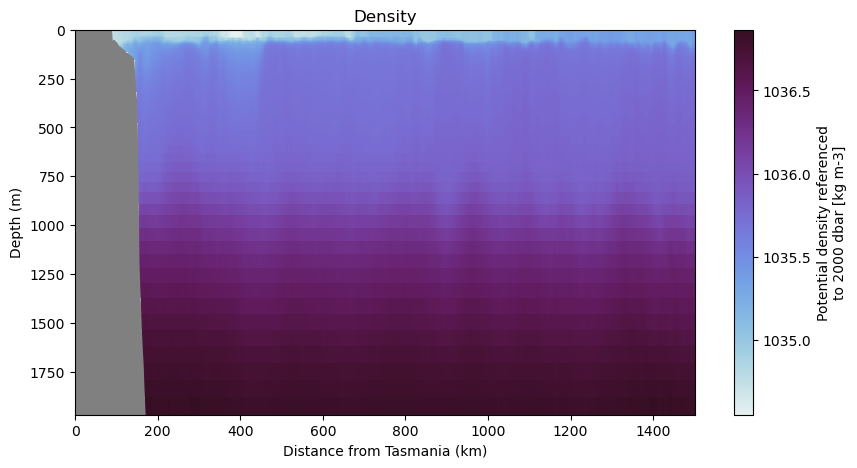

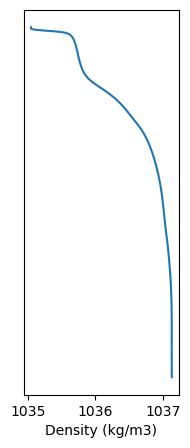

In [96]:
fig,ax = plt.subplots(1,figsize = (10,5))
cmap = cmocean.cm.dense

rho = xr.open_dataset("/g/data/nm03/ab8992/outputs/full-40/output100/rho/rho_y10.nc").rho.isel(time = 0)
bathy = xr.open_dataset("/g/data/nm03/ab8992/outputs/full-40/bathy_transect.nc")
rho.isel(yb = 5).sel(zl = slice(0,2000)).plot(ax = ax,cmap = cmap)
ax.fill_between(rho.xb,bathy.depth.sel(yb = rho.isel(yb = [5]).yb.isel(yb = 0).values,method = "nearest").values,5200,color = "grey")

# .plot(ax = ax)
ax.invert_yaxis()
ax.set_xlabel("Distance from Tasmania (km)")
ax.set_ylabel("Depth (m)")
ax.set_title("Density")

fig,ax = plt.subplots(1,figsize = (2,5))
rho.isel(yb = 5).mean("xb").plot(ax = ax,y = "zl")
ax.invert_yaxis()
ax.set_title("")
ax.set_ylabel("")
ax.set_yticks([])
ax.set_xlabel("Density (kg/m3)")


$\huge \nabla \cdot u \neq 0 $

In [21]:
# 100 * 52 / ## Check number of outputs available
#100 for beamless-40. That's upper limit
hours = 22000 + 365 * 5 * 24
outputs = hours / (24 * 15)
outputs
total = (233 * 100) / 24
print(outputs,total)

182.77777777777777 970.8333333333334


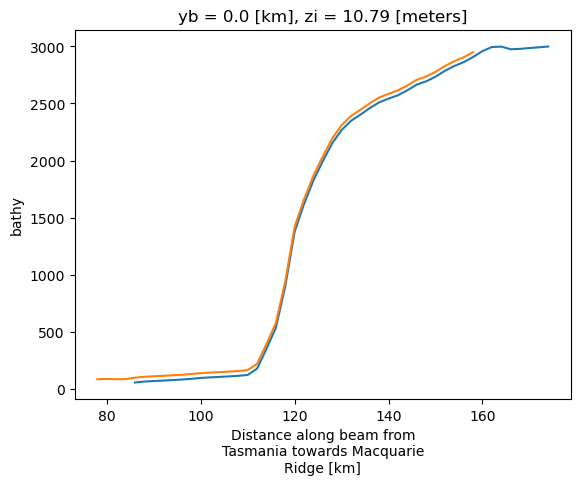

In [47]:
ShelfMask(full40).bathy.sel(yb = 0,method = "nearest").plot()
ShelfMask(smooth40).bathy.sel(yb = 0,method = "nearest").plot()